In [1]:
import numpy as np

import matplotlib.pyplot as plt

## Сегодняшние данные

400 фото человеческого лица. Каждое лицо это 2д массив 64х64 пикселей

In [2]:
from sklearn.datasets import fetch_olivetti_faces # импортируем датасет с картинками
data = fetch_olivetti_faces().images # закидываем картинки из датасета в переменную

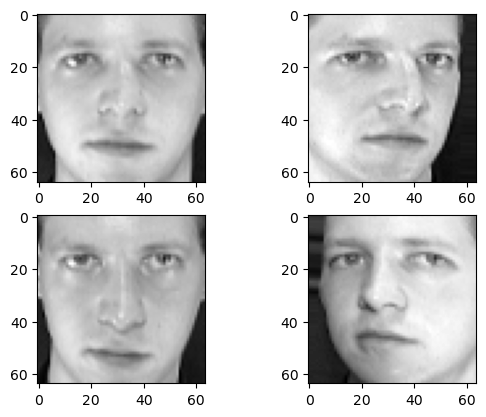

In [3]:
# Этот код показывает matplotlib subplots. 
# синтаксис: plt.subplot(высота, ширина, индекс начиная с 1)

plt.subplot(2,2,1)
# imshow: отображение данных в виде изображения
plt.imshow(data[0],cmap='gray') # data[0] - картинка 0 из переменной с датасетом, cmap - цвет полотна
plt.subplot(2,2,2)
plt.imshow(data[1],cmap='gray')
plt.subplot(2,2,3)
plt.imshow(data[2],cmap='gray')
plt.subplot(2,2,4)
plt.imshow(data[3],cmap='gray')

## Проблемы реконструкции лица

Давайте решим проблему реколнструкии лица: учитывая левые половины лицx (X), наш алгорим должен предсказывать правую полину(y). Наш первый шаг разделить фото на X и y используя срезы.

__Срезы в numpy:__
* В обычном питоне срез выглядит так: `a[2:5]` _(берет элементы от 2 до 5)_,
* Numpy позволяет вам нарезать N-мерный массив по каждому измерению: [индекс картинки, высота, ширина],
  * `data[:10]` - Берет первые 10 изображений
  * `data[:, :10]` - Для всех изображений берет горизонтальную полосу высотой 10 пикселей в верхней части изображения.
  * `data[10:20, :, -25:-15]` - Берет картинки [10, 11, ..., 19], для каждого изображения берет _вертикальную полосу_ шириной 10 пикселей, на расстоянии 15 пикселей от _правой_ стороны

__Ваша задача:__

Давайте используем срезы, чтобы выбрать все __левые половинки изображения как X__ и все __правые половины как у__.

In [4]:
data.shape # размер датасета - 400 фото, каждое фото - массив 64 на 64

(400, 64, 64)

In [5]:
# выберите левую половину каждой грани как X, правую половину как Y

# data[все картинки, вся высота, до 32-го пикселя по ширине(левая половина картинок)]
X = data[:, :, :32]

# data[все картинки, вся высота, от 32-го пикселя по ширине(правая половина картинок)]
y = data[:, :, 32:]

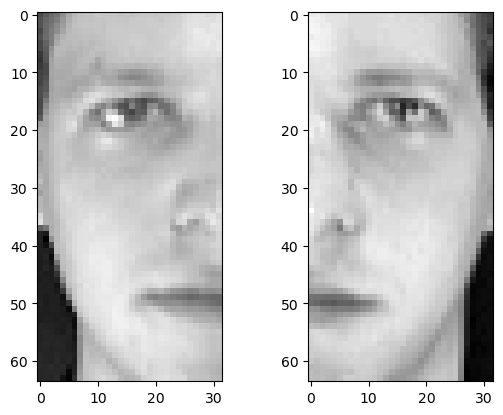

In [6]:
# Если вы все сделали правильно, вы увидите левое и правое полуизображения, нарисованные отдельно в естественном порядке.

plt.subplot(1,2,1) # .subplot(1 - высота, 2 - ширина, 1 - индекс на полотне)
plt.imshow(X[0],cmap='gray') # x[0] - из набора из правых половинок картинок, берем 0 (первую) 
plt.subplot(1,2,2)
plt.imshow(y[0],cmap='gray') # y[0] - из набора из левых половинок картинок, берем 0 (первую) 

# проверка
assert X.shape == y.shape == (len(data), 64, 32), "Пожалуйста, разрежьте ровно левую половину лица до X и правую половину лица до Y"

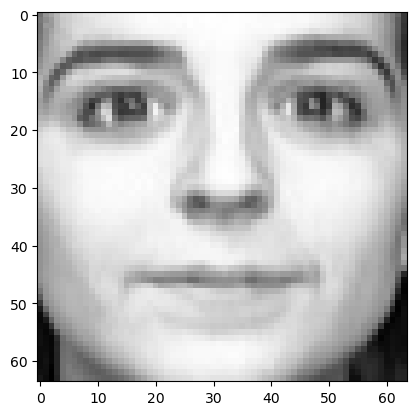

In [7]:
# функция, которая объединяет две половинки картинок
def glue(left_half,right_half): # принимает левую и правую части 
    # объединить фотографии обратно вместе
    # соединяется левая и правая часть по оси -1 - то есть по горизонатли
    # если ось 1, то правая часть была бы под левой, т.е. снизу
    left_half = left_half.reshape([-1, 64, 32]) # нужно, чтобы вернуть 3-х мерный массив, после предсказаний
    right_half = right_half.reshape([-1, 64, 32]) # # нужно, чтобы вернуть 3-х мерный массив, после предсказаний
    return np.concatenate([left_half, right_half], axis=-1) 

# если вы все сделали правильно, вы увидите настоящее лицо
plt.imshow(glue(X, y)[99], cmap='gray') # проверим на картике 99 из датасета

## Linear regression Линейная регрессия

In [8]:
from sklearn.model_selection import train_test_split # модуль благодаря которому мы будем делить 
                                                     # датасет на данные для обучения и тестирования

# Обучать мы будем на X_train и y_train, а делать прогноз и проверять качество модели на X_test и y_test 
# С помощью импортированного модуля разделяем датасет из левых и правых картинок
# Передаем X и y 
# Из-за того, что у нас картинки размером 64 на 32, нам нужно поменять размернотсь массива 
# Задаем размер тестовой выборки в 5% 
# и random state - он управляет перемешиванием данных перед применением разделения
X_train, X_test, Y_train, Y_test = train_test_split(X.reshape([len(X), -1]),
                                                    y.reshape([len(y), -1]),
                                                    test_size=0.05, random_state=42)

print(X_test.shape) # размер x массива тестовой выборки 

(20, 2048)


In [9]:
# из набора линейных моделей библиотеки sklearn импортируем линейную регрессию
# линейная регрессия - это статистический метод, который используется для описания отношения между
# двумя перемеными. Она пытается найти линейную зависимость между зависимой и независимой переменной,
# чтобы с помощью независимой переменной прогнозировать значение зависимой
from sklearn.linear_model import LinearRegression 

model = LinearRegression() # создаем объект класса линейной регрессии

# обучим модель, т.е. найдем веса или наклон и сдвиг прямой с помощью функции потерь
model.fit(X_train, Y_train)

LinearRegression()

измерить среднеквадратичную ошибку

In [10]:
# импортируем функцию вычисления среднеквадратической ошибки из модуля с метриками
# среднеквадратичная ошибка - это среднее арифметическое квадратов разностей между предсказанными
# и реальными значениями модели
from sklearn.metrics import mean_squared_error 

# model.predict(X_train) - предсказывает значения на основе левых частей картинок обучающей выборки
# для вычисления передается Y_train, где лежат истинные значения
print("Train MSE:", mean_squared_error(Y_train, model.predict(X_train)))
# то же самое, только на тестовой выборке
print("Test MSE:", mean_squared_error(Y_test, model.predict(X_test)))

Train MSE: 3.1782775e-12
Test MSE: 0.010284027


## Почему ошибка train намного меньше, чем ошибка test?

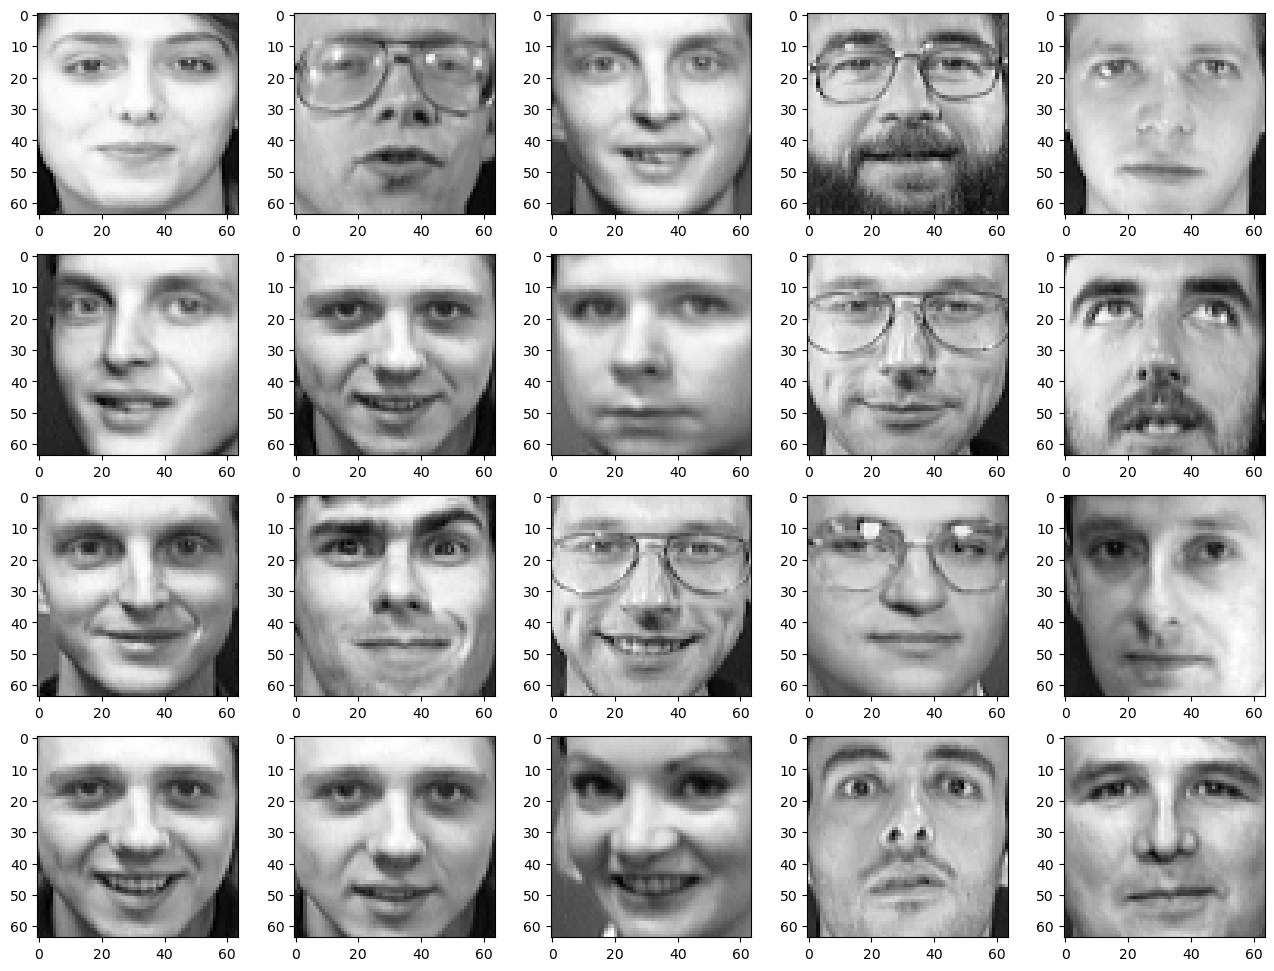

In [11]:
# Предсказания на обучающей выборке

# используем метод, который соединяет левую и правую части картинок
# левая часть в X, правая в Y
# т.к. нужны предсказанные Y, то используем обученную ранее модель линейной регрессии на основе левых частей картинок
pics = glue(X_train, model.predict(X_train))  #задание: реконструировать и склеить X и предсказанный Y для набора данных train

# plt.figure() - класс, который создает некий контейнер для хранения графиков
plt.figure(figsize=[16, 12]) 
for i in range(20): # 20 фотографий
    plt.subplot(4, 5, i + 1) # 4 - высота, 5 - ширина, и индекс
    plt.imshow(pics[i], cmap='gray') # отрисовка картинок

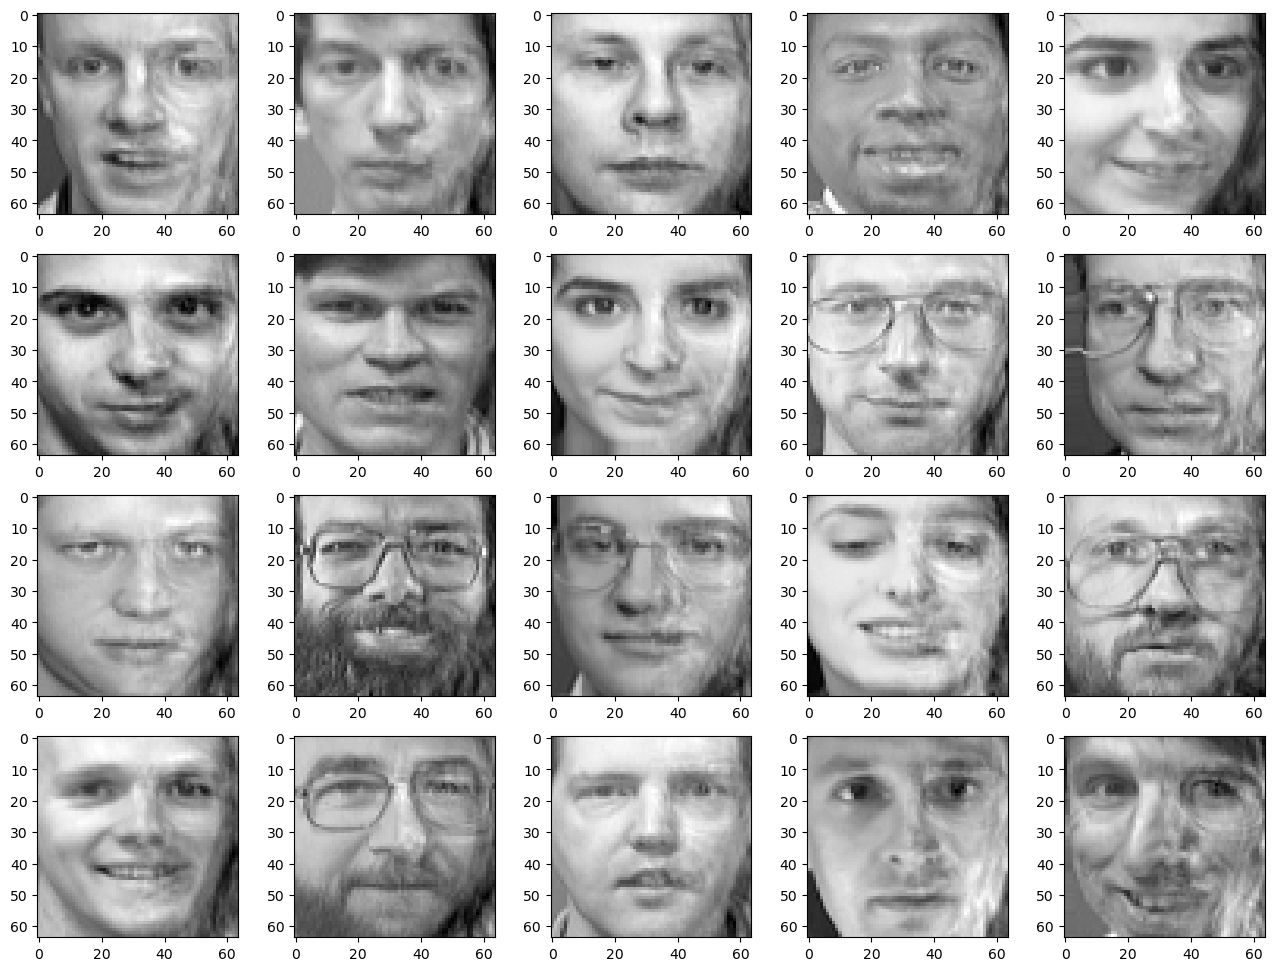

In [12]:
# Предсказания на тестовой выборке
pics = glue(X_test, model.predict(X_test)) # задание : реконструировать и склеить X и предсказанный Y для тестового набора данных

plt.figure(figsize=[16, 12])
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(pics[i], cmap='gray')

## Regularisation Регуляризация

В пакете sklearn много линейных моделей, и все их можно найти [здесь](https://scikit-learn.org/stable/modules/linear_model.html). Мы сосредоточимся на 3 из них: Ridge regression, Lasso и ElasticNet. Идея всех очень проста: добавить некоторый штраф к целевой функции потерь, чтобы предотвратить переобучение.

регуляризация помогает уменьшать переобучение

## Ridge regression Регрессия хребта

Регрессия хребта - это метод линейной регрессии, который используется для борьбы с проблемой мультиколлинеарности (высокой корреляции между факторами) в данных. Он работает путем добавления штрафа на коэффициенты регрессии, чтобы ограничить их значения и снизить влияние мультиколлинеарности.

Мультиколлинеарность - это проблема, возникающая в регрессионном анализе, когда два или более фактора в модели сильно коррелируют между собой. Это означает, что эти факторы предоставляют похожую информацию о зависимой переменной и, следовательно, могут сильно влиять на оценки регрессионных коэффициентов. Проблема мультиколлинеарности заключается в том, что она приводит к нестабильности оценок регрессионных коэффициентов и усложняет интерпретацию результатов. Оценки коэффициентов могут быть сильно завышены или занижены, что может привести к неверным выводам о влиянии факторов на зависимую переменную. 

Принцип работы Ridge regression заключается в добавлении штрафа L2-нормы (квадратичного ограничения) на коэффициенты регрессии. Это означает, что при обучении модели Ridge regression, мы минимизируем сумму квадратов ошибки регрессии и сумму квадратов коэффициентов, умноженных на коэффициент регуляризации alpha. Это позволяет уменьшить значения коэффициентов регрессии и снизить их влияние на предсказания модели. 

RidgeRegression — это просто LinearRegression с регуляризацией l2 — штрафуется за $\alpha \cdot \sum{_i w_i^2}$

Давайте обучим такую ​​модель с альфа = 0,5

In [14]:
from sklearn.linear_model import Ridge # импортируем алгоритм регрессии Ridge

ridge = Ridge(alpha = 0.5) # создаем объект модели с альфой = 0.5

ridge.fit(X_train, Y_train) # обучаем модель на обучающей выборке

Ridge(alpha=0.5)

In [15]:
# вычисляем среднюю квадратическую ошибку на обучающих данных, где предсказываем значения с помощью ridge
# ridge.predict(X_train) - предсказывает значения на основе левых частей картинок обучающей выборки
print("Train MSE:", mean_squared_error(Y_train, ridge.predict(X_train))) 

# то же самое на тестовой выборке
print("Test MSE:", mean_squared_error(Y_test, ridge.predict(X_test)))

Train MSE: 0.0004230584
Test MSE: 0.008029614


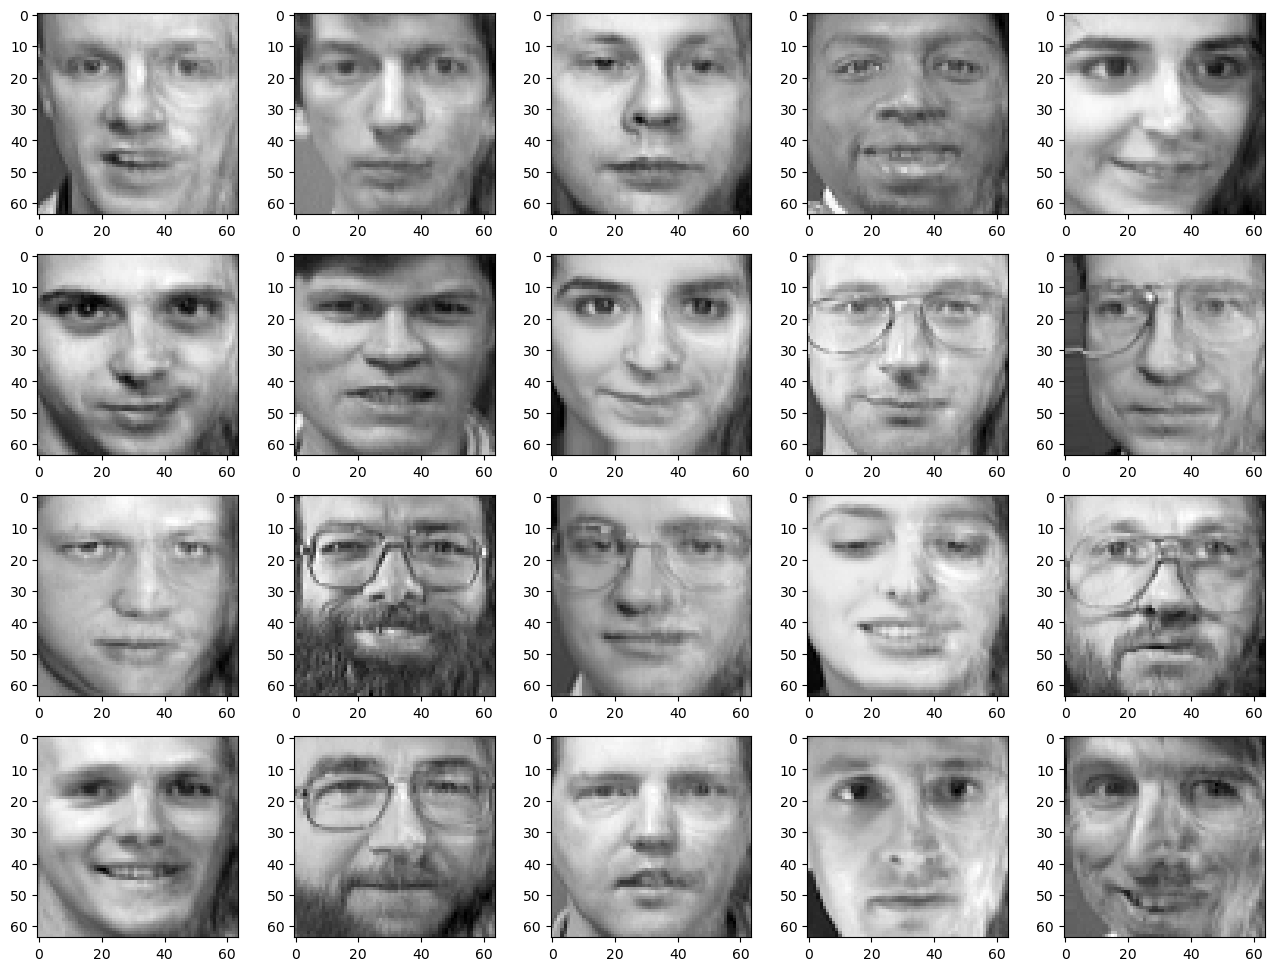

In [16]:
# предсказания на обучающей выборке

# соединяем левые (X) части картинок и предсказанные проавые (Y), предсказаны с помощью ridge 
# на основе левых частей картинок тестовой выборки
pics = glue(X_test, ridge.predict(X_test)) # задание: реконструировать и склеить X и предсказанный Y для тестового набора данных

plt.figure(figsize=[16, 12])
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(pics[i], cmap='gray')

## Finding the best `alpha` (grid search) 
## Поиск лучшей `альфы` (поиск по сетке)

`sklearn` имеет предварительно реализованный класс — `sklearn.model_selection.GridSearchCV` — который обертывает вашу модель и оптимизирует ее гиперпараметры с помощью перекрестной проверки K-fold cross-validation. Значения гиперпараметров берутся из конечного набора значений в прямоугольной сетке (поэтому метод называется поиском по сетке). Чтобы использовать его, вам нужно установить сетку значений гиперпараметров, метрику, которую вы хотите оптимизировать, и количество кратностей перекрестной проверки.

GridSearchCV - это алгоритм оптимизации гиперпараметров, который перебирает все возможные комбинации гиперпараметров из заданного диапазона и находит наилучшие гиперпараметры, которые дают наилучшие результаты на кросс-валидации.

Процесс работы GridSearchCV:

- Задаются модель и диапазон гиперпараметров, которые необходимо настроить.

- GridSearchCV создает сетку из всех возможных комбинаций гиперпараметров.

- Для каждой комбинации гиперпараметров выполняется кросс-валидация, где данные разбиваются на K фолдов, где K - это число, заданное пользователем. Для каждой комбинации гиперпараметров выполняется K раз итерация, где каждый раз один из K фолдов используется как тестовый, а остальные как обучающие.

- Для каждой комбинации гиперпараметров вычисляется средняя оценка метрики качества, которая задана пользователем (например, точность, F1-мера, средняя квадратичная ошибка и т.д.).

- Наилучшие гиперпараметры выбираются на основе наилучшей средней оценки метрики качества.

- Модель обучается на всем наборе данных с использованием наилучших гиперпараметров.

- Обученная модель возвращается пользователю.

`Кросс-валидация позволяет оценить качество модели более точно, чем просто разбиение данных на тренировочный и тестовый наборы.`

Кросс-валидация (Cross-validation) - это метод оценки качества модели машинного обучения, который позволяет проверить, насколько хорошо модель обобщает данные.

В кросс-валидации данные разбиваются на несколько частей (фолдов), например, на 5 или 10 частей. Затем модель обучается на частях данных (называемых тренировочными данными) и проверяется на оставшейся части данных (называемой тестовыми данными). Этот процесс повторяется несколько раз, при этом каждый раз данные разбиваются на разные части.

Основная идея кросс-валидации заключается в том, чтобы убедиться, что модель не переобучилась на тренировочных данных и может обобщать данные на новых данных. При использовании кросс-валидации уменьшается вероятность того, что модель будет переобучена на конкретных тренировочных данных и даст хорошие результаты только на них.

In [17]:
from sklearn.model_selection import GridSearchCV # импортируем алгоритм оптимизации гипрепараметров

Fitting 5 folds for each of 13 candidates, totalling 65 fits


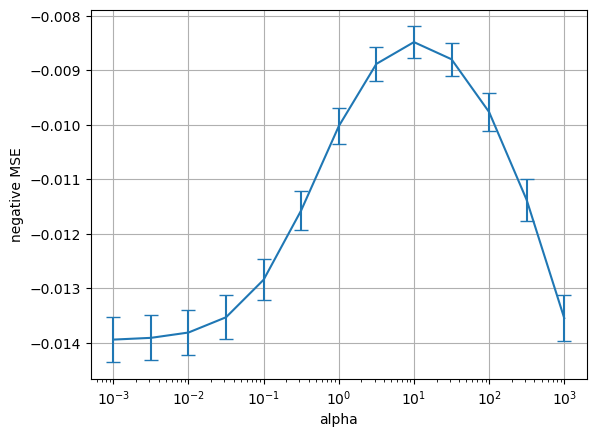

In [30]:
# словарь c ключем 'alpha', а значение - logspace(), который
# возвращает одномерный массив из указанного количества элементов, значения которых равномерно
# распределенны по логарифмической шкале внутри заданного интервала.

# -3 - start - является началом последовательности, которое равно base в степени start
# 3 - stop - является концом последовательности
# 13 - определяет количество элементов последовательности
# base=10 - основание логарифмической шкалы

# Нужно будет для сетки в GridSearchCV
parameter_dict = {"alpha" : np.logspace(-3, 3, 13, base = 10)}

# создаем объект с алгоритмом GridSearchCV и задаем параметры
gscv = GridSearchCV(
    estimator = Ridge(), # задаем модель для оптимизации, сейчас используем ridge (регрессия хребта)
    param_grid = parameter_dict, # сетка значений параметров
    
#     Отрицательная оценка метрики качества используется в тех случаях, когда оптимизация метрики означает
#     минимизацию ее значения. Например, если мы рассматриваем задачу оптимизации функции потерь, то мы
#     хотим минимизировать ее значение, чтобы улучшить качество модели. В этом случае, метрика качества 
#     будет отрицательной, чтобы ее оптимизация также означала минимизацию.
    scoring = 'neg_mean_squared_error', # Для каждой комбинации гиперпараметров вычисляется средняя оценка метрики качества. 
                                        # Метрика - это должна быть оценка, поэтому берем отрицательную MSE
    
    cv = 5, # cколько разбиение кросс-валидации мы ходим сделать
    verbose = 2, # отвечает за уровень подробности вывода информации об обучении модели во время выполнения перекрестной проверки (cross-validation)
    n_jobs=-1 # отвечает за количество ядер процессора, которые будут использоваться для выполнения перекрестной проверки (cross-validation) при подборе гиперпараметров модели.
    # при -1 будут использоваться все ядра
)

gscv.fit(X_train, Y_train) # обучаем объект на обучающих данных

# отображаем данные gscv на графике
plt.errorbar(gscv.param_grid['alpha'], # данные сетки, заданные ранее 
             gscv.cv_results_['mean_test_score'], # является средним значением, рассчитанным для всех образцов, где каждый образец имеет одинаковый вес.
             gscv.cv_results_['std_test_score'] / gscv.cv**0.5, # деление стандартного отклонения на корень из числа выполненных разбиений позволяет вычислить стандартную ошибку среднего значения оценки качества на тестовых данных. Это позволяет оценить точность среднего значения оценки качества на тестовых данных, полученной в результате кросс-валидации.
             capsize = 5) # длина "колпачков" на концах линий ошибок
plt.xscale("log") # изменяет масштаб оси x на логарифмический, расстояние между значениями на оси x увеличивается экспоненциально, что позволяет лучше визуализировать данные с очень большой разницей между значениями
plt.xlabel("alpha") # надпись на оси x
plt.ylabel("negative MSE") # надпись на оси y
plt.grid() # рисует сетку

Теперь вы можете найти лучшую модель как `gscv.best_estimator_`. Используйте его, чтобы снова сделать реконструкцию теста:

In [31]:
gscv.best_estimator_

Ridge(alpha=10.0)

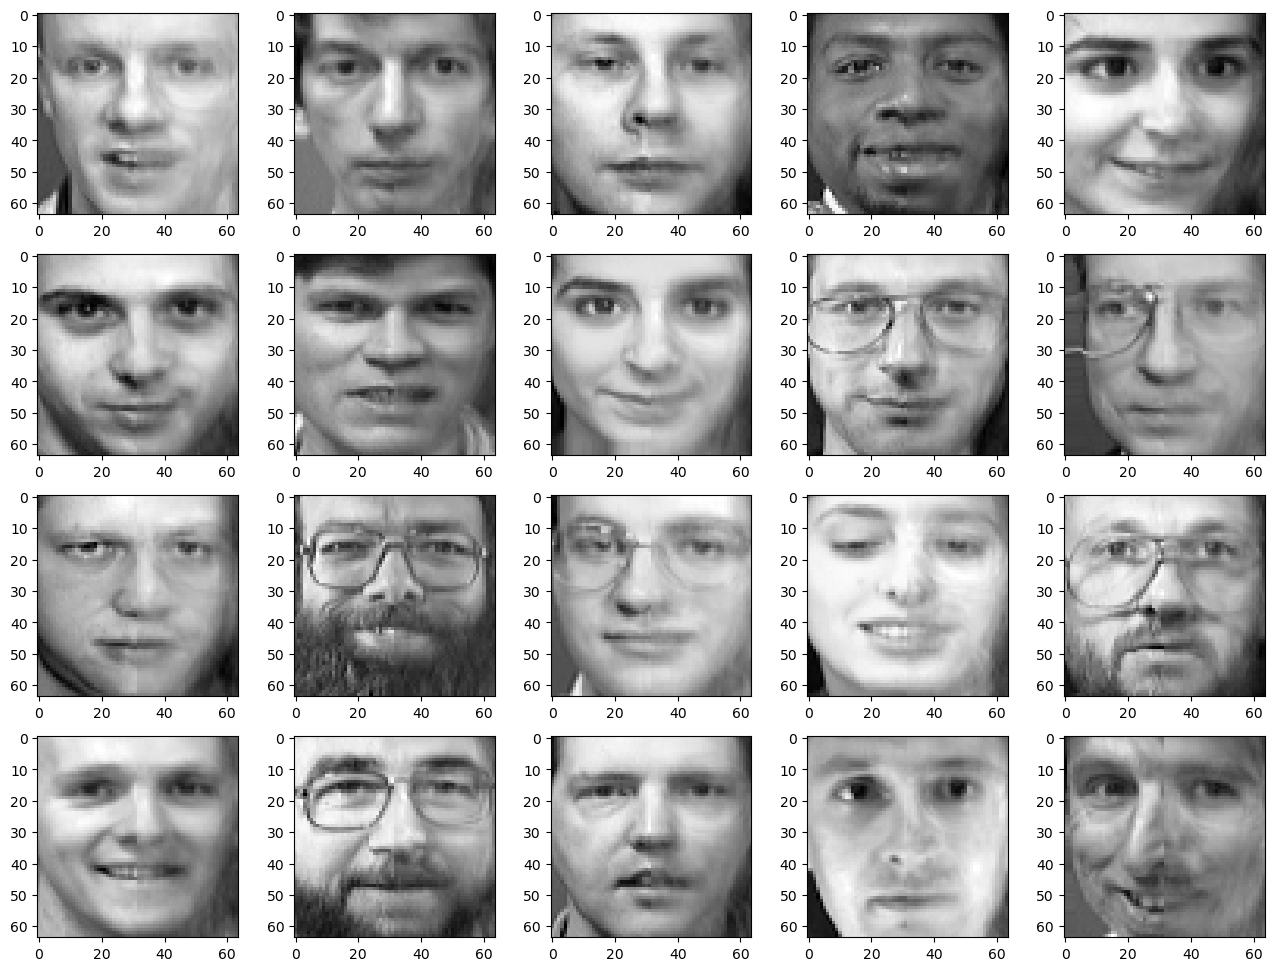

In [32]:
# Предсказания на тестовой выборке

# соединяем картинки, используя наш объект с алгоритмом GridSearchCV и моделью Ridge предсказываем 
# правые половинки картинок на основе левых половинок тестовой выборки
# best_estimator_ позволяет использовать прогнозирование непосредственно в нашем экземпляре GridSearchCV
pics = glue(X_test, gscv.best_estimator_.predict(X_test))
plt.figure(figsize=[16, 12])
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(pics[i], cmap='gray')

Модель оптимизации Lasso (Least Absolute Shrinkage and Selection Operator) - это метод регрессии, который используется для выбора наиболее важных признаков в наборе данных и уменьшения размерности модели. Он основан на минимизации суммы квадратов ошибок (RSS) с ограничением на сумму абсолютных значений коэффициентов регрессии.

Принцип работы модели Lasso заключается в том, что она добавляет штраф к функции потерь (loss function - функция, которая измеряет, насколько хорошо модель соответствует данным во время обучения. Она используется для оптимизации модели путем нахождения минимума функции потерь. Чем меньше значение функции потерь, тем лучше модель соответствует данным), который пропорционален сумме абсолютных значений коэффициентов регрессии. Это позволяет уменьшить вес незначимых признаков и исключить их из модели, что уменьшает переобучение и повышает обобщающую способность модели. Однако, Lasso может привести к нулевым коэффициентам для некоторых признаков, что делает их полностью исключенными из модели.

Для оптимизации коэффициентов регрессии в модели Lasso используется метод градиентного спуска или координатного спуска. Эти методы позволяют найти оптимальные значения коэффициентов, которые минимизируют функцию потерь с учетом ограничения на сумму абсолютных значений коэффициентов.

Fitting 5 folds for each of 13 candidates, totalling 65 fits


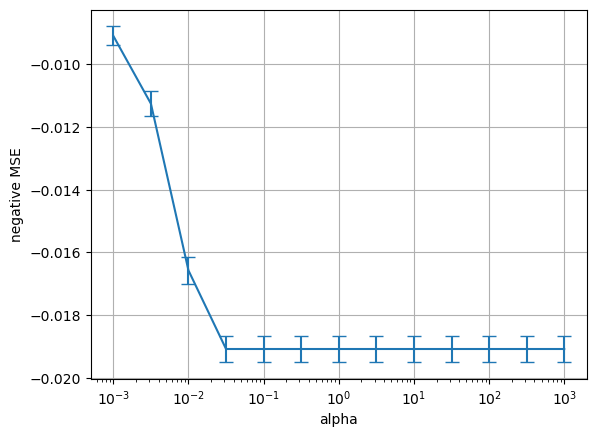

In [33]:
from sklearn.linear_model import Lasso, ElasticNet

# Задание: Используйте приведенный выше код для выполнения GridSearch для Lasso и/или ElasticNet
# модели. Обратите внимание, что Lasso и ElasticNet *много*
# медленнее подходит, по сравнению с Ridge (особенно для малых альф).

parameter_dict = {"alpha" : np.logspace(-3, 3, 13, base=10)}

gscv = GridSearchCV(
    estimator = Lasso(), # используем модель оптимизации Lasso
    param_grid = parameter_dict, 
    scoring = 'neg_mean_squared_error',
    cv = 5, 
    verbose = 2, 
    n_jobs = -1)

gscv.fit(X_train, Y_train)

plt.errorbar(gscv.param_grid['alpha'],
             gscv.cv_results_['mean_test_score'],
             gscv.cv_results_['std_test_score'] / gscv.cv**0.5,
             capsize=5)
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("negative MSE")
plt.grid()

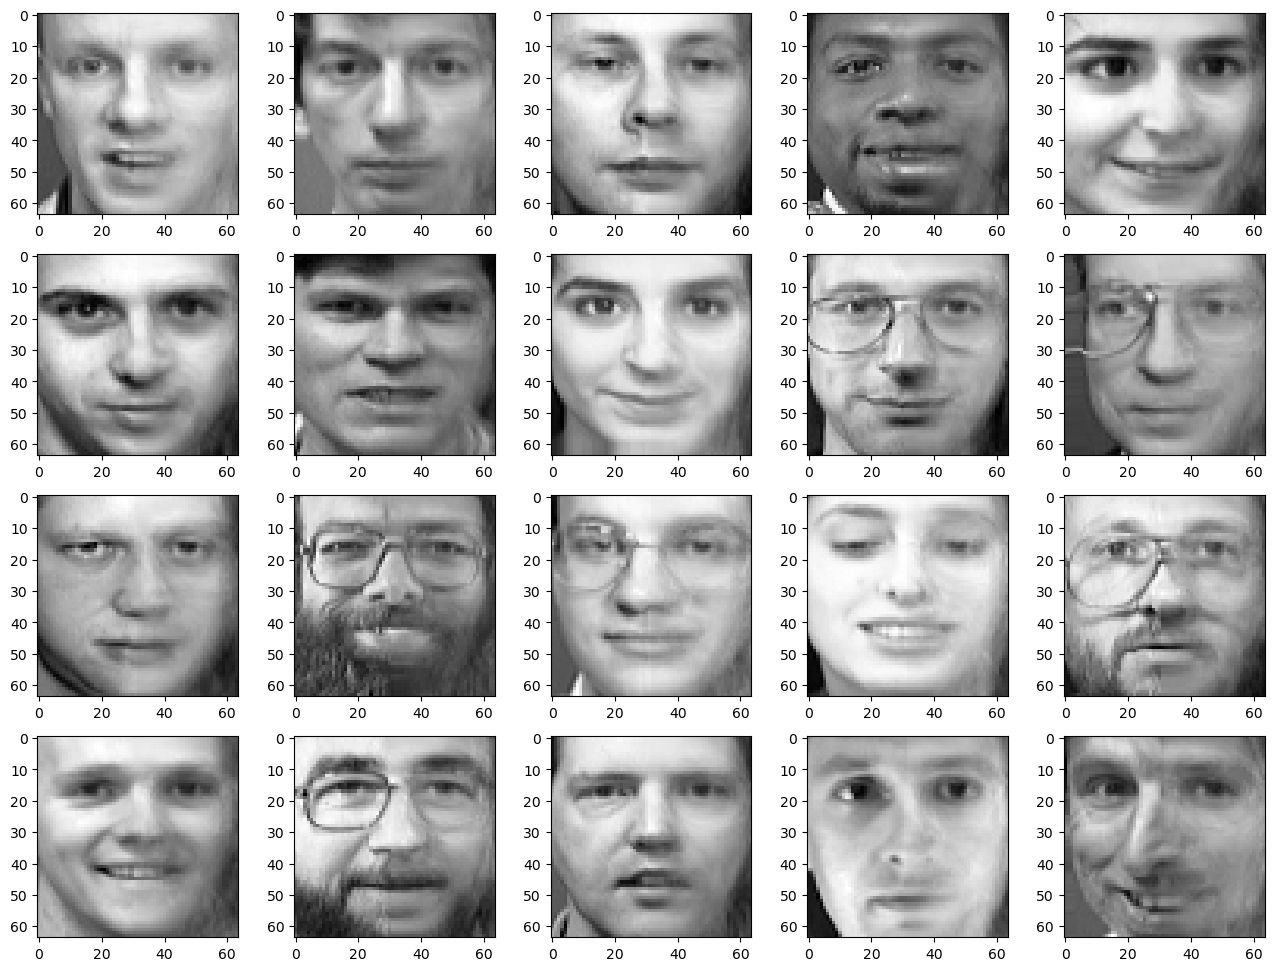

In [35]:
# Предсказания на тестовой выборке
pics = glue(X_test, gscv.best_estimator_.predict(X_test))
plt.figure(figsize=[16, 12])
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(pics[i], cmap='gray')

Модель оптимизации ElasticNet - это метод регрессии, который комбинирует преимущества Lasso и Ridge регрессии. Она использует два типа штрафов для регуляризации - L1 и L2, чтобы уменьшить сложность модели, уменьшить переобучение и улучшить ее обобщающую способность.

L1 штраф используется в ElasticNet для отбора признаков, как и в Lasso. Он добавляет штраф к сумме абсолютных значений регрессионных коэффициентов, что приводит к тому, что некоторые коэффициенты становятся равными нулю, что означает исключение соответствующих признаков из модели.

L2 штраф используется для сокращения размера регрессионных коэффициентов, как и в Ridge. Он добавляет штраф к сумме квадратов регрессионных коэффициентов, что приводит к уменьшению значений коэффициентов, но не до нуля. Это позволяет сохранить все признаки в модели и снизить влияние шума на регрессионные коэффициенты.

Таким образом, ElasticNet использует комбинацию L1 и L2 штрафов для регуляризации регрессионных коэффициентов, что позволяет балансировать отбор признаков и сокращение размера коэффициентов. Для оптимизации регрессионных коэффициентов в ElasticNet используется метод градиентного спуска или координатного спуска, как и в Lasso и Ridge. 

Fitting 5 folds for each of 13 candidates, totalling 65 fits


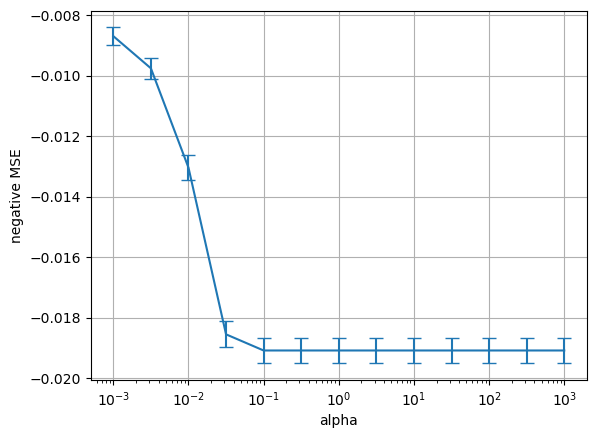

In [36]:
parameter_dict = {
    "alpha" : np.logspace(-3, 3, 13, base=10)
}

gscv = GridSearchCV(
    estimator = ElasticNet(), # используем модель оптимизации ElasticNet
    param_grid = parameter_dict, 
    scoring = 'neg_mean_squared_error',
    cv = 5, 
    verbose = 2, 
    n_jobs = -1)
gscv.fit(X_train, Y_train)

plt.errorbar(gscv.param_grid['alpha'],
             gscv.cv_results_['mean_test_score'],
             gscv.cv_results_['std_test_score'] / gscv.cv**0.5,
             capsize=5)
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("negative MSE")
plt.grid()

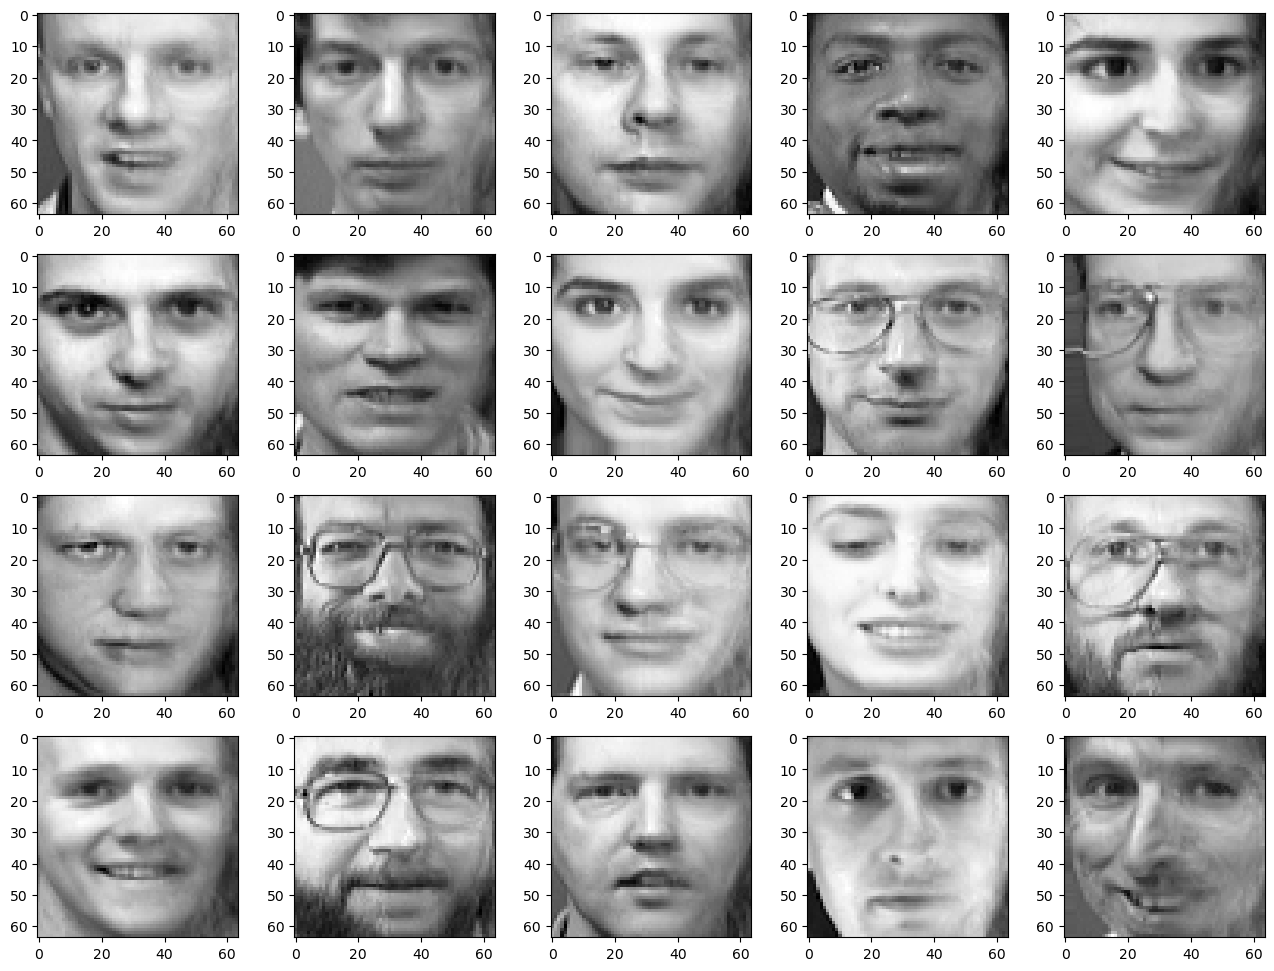

In [37]:
# Предсказания на тестовой выборке
pics = glue(X_test, gscv.best_estimator_.predict(X_test))
plt.figure(figsize=[16, 12])
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(pics[i], cmap='gray')

## Добавьте transformers и сделайте pipeline

`some_transformer = sklearn.some_module.SomeTransformerClass(some_parameters)` # создать объект-трансформер


`some_transformer.fit(X, y)` # научиться преобразовывать данные
                           (например для StandardScaler вычислить среднее значение и стандартное значение столбцов в X)


`some_transformer.transform(X)` # преобразовать features

StandardScaler - это класс для масштабирования признаков, который преобразует каждый признак путем удаления среднего значения и масштабирования до единичной дисперсии. Масштабирование признаков может улучшить работу модели, так как многие алгоритмы машинного обучения работают лучше, когда все признаки находятся в одном диапазоне.

Pipeline позволяет объединять несколько шагов вместе и обеспечивает их последовательное выполнение. Это упрощает процесс предобработки данных и моделирования, так как каждый шаг можно настроить отдельно или вместе с другими шагами

In [58]:
# задание: создать новую модель Ridge, используя pipeline с StandardScaler() и регрессией Ridge
# обучите модель и напечатайте «Train MSE» и «Test MSE»
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# у нас 2 шага - масштабирование данных с помощью StandardScaler и обучение модели Ridge регрессии
new_ridge_model = Pipeline([('scaler', StandardScaler()),
                            ('ridge', Ridge())])

new_ridge_model.fit(X_train, Y_train)

# Оцениваем качество модели на тестовых данных
print(new_ridge_model.score(X_test, Y_test))

0.5315939127962939


у нас StandardScaler применяется к обучающим данным и используется для масштабирования признаков перед обучением модели Ridge регрессии. Затем Pipeline автоматически применяет те же преобразования к тестовым данным, чтобы обеспечить согласованность масштабирования признаков между обучающими и тестовыми данными. Это позволяет получить более точные оценки качества модели на тестовых данных.

In [46]:
print('Train MSE', mean_squared_error(X_train, new_ridge_model.predict(X_train)))
print('Test MSE', mean_squared_error(X_test, new_ridge_model.predict(X_test)))

Train MSE 0.040536083
Test MSE 0.044923607


Этот pipeline можно использовать внутри GridSearchCV, например:

Fitting 5 folds for each of 9 candidates, totalling 45 fits


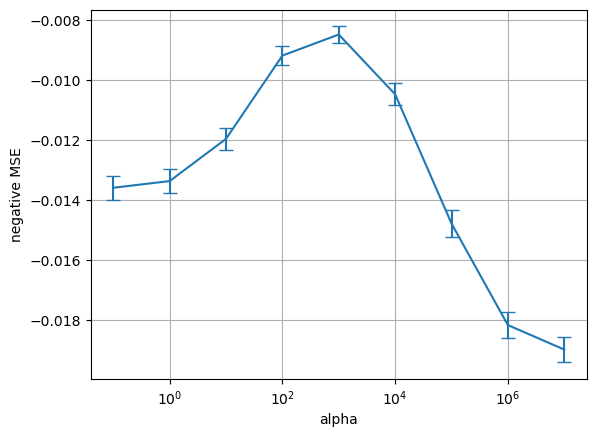

In [64]:
parameter_dict = {
    "ridge__alpha" : np.logspace(-1, 7, 9, base=10) # обратите внимание на префикс 'ridge__'
                                                    # который сообщает, к какому шагу 
                                                    # pipeline относится этот параметр
}

gscv = GridSearchCV(
    estimator = new_ridge_model,
    param_grid = parameter_dict,
    scoring = 'neg_mean_squared_error',
    cv = 5,
    verbose = 2,
    n_jobs = -1)

gscv.fit(X_train, Y_train)


plt.errorbar(gscv.param_grid['ridge__alpha'],
             gscv.cv_results_['mean_test_score'],
             gscv.cv_results_['std_test_score'] / gscv.cv**0.5,
             capsize=5)
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("negative MSE")
plt.grid()

# Выбросы влияют на регрессию

Помните, что когда мы минимизируем потери
$$ MSE = (\hat y - y)^2$$
который наказывает больше за более высокие значения ошибки. Как это повлияет на набор данных с выбросами, как вы думаете? (Если метод минимизации потерь наказывает больше за более высокие значения ошибки, то выбросы будут иметь большее влияние на результаты модели, чем остальные значения в наборе данных. Это может привести к тому, что модель будет склонна к предсказанию значений, которые более близки к выбросам, даже если они не являются хорошими предсказаниями для остальных значений в наборе данных.)

Вот пример регрессии, основанной на обычном LR и RANSAC, который итеративно обучается на случайных подвыборках данных, пытаясь выявить выбросы.

`class sklearn.linear_model.RANSACRegressor(base_estimator=None, *, min_samples=None, residual_threshold=None, is_data_valid=None, is_model_valid=None, max_trials=100, max_skips=inf, stop_n_inliers=inf, stop_score=inf, stop_probability=0.99, loss='absolute_error', random_state=None)`

Алгоритм регрессора RANSAC:
- Выберите случайные выборки min_samples из исходных данных и проверьте, является ли набор данных действительным.
- Обучите модель со случайным подмножеством (base_estimator.fit) и проверьте, действительна ли предполагаемая модель.
- Классифицируйте все данные как выбросы или выбросы путем вычисления остатков для оценочной модели (base_estimator.predict(X) – y) — все выборки данных с абсолютными остатками, меньшими или равными остаточному_порогу, считаются выбросами.
- Сохраните подогнанную модель как лучшую модель, если количество внутренних выборок максимально. В случае, если текущая оценочная модель имеет такое же количество вставок, она считается лучшей моделью только в том случае, если она имеет более высокий балл.

In [87]:
import numpy as np # импортируем модуль нампай, для математических вычислений
from matplotlib import pyplot as plt # пакет для визуализации данных

from sklearn import linear_model, datasets # линейные модели и датасеты

n_samples = 1000 # 1000 точек
n_outliers = 50 # 50 точек для выбросов

# make_regression() генерирует данные для задачи регрессии
# n_samples - 1000 точек, n_features = 1 признак
# n_informative = количество признаков,используемых для построения линейной модели
# noise = Стандартное отклонение гауссового шума на выходе.
# coef = Коэффициент лежащей в основе линейной модели
# random_state = сид
#X - Входные образцы, y -Выходные значения, coef - Коэффициент базовой линейной модели
X, y, coef = datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      coef=True, random_state=0)

# Добавить выбросные данные
np.random.seed(0) # устаревшая функция, которая существует для поддержки старого кода, использующего одноэлементное RandomState
# создает n_outliers выбросов, точки для них определяются путем генерации случайных значений из нормального распределения
# size=(n_outliers, 1) - размерность массива, где n_outliers строк и 1 столбец
# 0.5 - разброс выбросов по оси {}
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers) # 10 - разброс выбросов по оси y

# обучение линии с использованием всех данных
lr = linear_model.LinearRegression() # создаем объект с линейной регрессией
lr.fit(X, y) # обучаем модель на данных с разбросанными точками

# обучаем линейную модель с алгоритмом RANSAC
ransac = linear_model.RANSACRegressor() # создаем объект с RANSAC регркссией
ransac.fit(X, y) # обучаем модель на данных с разброссаными точками
# создает маску для точек, которые были отнесены к "хорошим" точкам моделью RANSAC
# Эта маска определяет точки, которые будут использоваться для обучения модели 
inlier_mask = ransac.inlier_mask_
# создает маску для выбросов, которая является обратной маске для "хороших" точек
outlier_mask = np.logical_not(inlier_mask)

# предскажем данные оценочных моделей
# создаем массив (np.arange), который содержит значения X от минимального до максимального значения
# после, с помощью  [:, np.newaxis], преобразуем одномерный массив в двумерный, где одно значение = одна строка 
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
# предсказывает данные, по линейной регрессии, выходных значений (line_y) на основе line_X 
line_y = lr.predict(line_X)
# предсказывает данные, по RANSAC регрессии, выходных значений (line_y_ransac) на основе line_X 
line_y_ransac = ransac.predict(line_X)

# Сравним оценочные коэффициенты
print("Estimated coefficients (true, linear regression, RANSAC):")
print(coef, lr.coef_, ransac.estimator_.coef_)

Estimated coefficients (true, linear regression, RANSAC):
82.1903908407869 [54.17236387] [82.08533159]


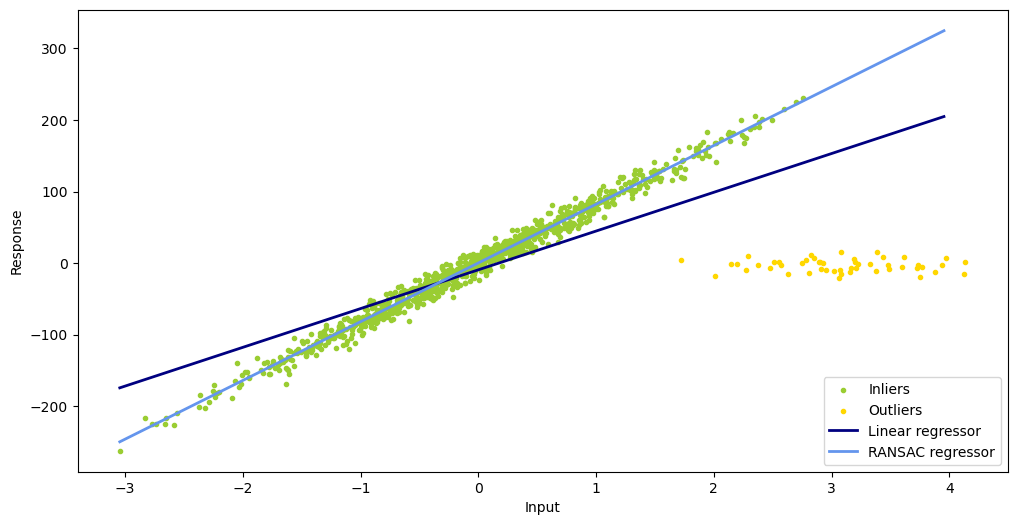

In [89]:
plt.figure(figsize=(12,6)) # задаем размер полотна
lw = 2 # толщина линий (нужно потом)

# plt.scatter - график разброса (точки)
plt.scatter(X[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.',
            label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color='gold', marker='.',
            label='Outliers')
plt.plot(line_X, line_y, color='navy', linewidth=lw, label='Linear regressor')
plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=lw,
         label='RANSAC regressor')
plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()

# Бонусная часть

Задание: Попробуйте использовать `sklearn.linear_model.SGDRegressor` с потерей `huber` в приведенном выше коде вместо `LinearRegression`. В этом случае лучше? Попробуйте изменить его параметр `эпсилон`.

HuberRegressor - это регрессионная модель, которая является модификацией линейной регрессии. Она использует функцию потерь Huber loss вместо квадратичной функции потерь, используемой в обычной линейной регрессии. Функция потерь Huber loss компенсирует воздействие выбросов на результаты моделирования, что делает ее более устойчивой к выбросам, чем обычная линейная регрессия.

Параметр эпсилон в модели HuberRegressor определяет границу между поведением функции потерь, соответствующим квадратичной функции потерь для небольших значений отклонения и поведением, соответствующим линейной функции потерь для больших значений отклонения. Другими словами, это параметр, который контролирует, как быстро функция потерь переходит от квадратичного поведения к линейному поведению при увеличении отклонения от целевого значения.

Если значение эпсилон маленькое, то функция потерь более похожа на квадратичную функцию потерь, что делает модель более чувствительной к выбросам. Если значение эпсилон большое, то функция потерь переходит к линейному поведению более быстро, что делает модель менее чувствительной к выбросам. 

In [103]:
n_samples = 1000
n_outliers = 50

X, y, coef = datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      coef=True, random_state=0)

np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

hb = linear_model.HuberRegressor(epsilon = 1) # Используем модель HuberRegressor
hb.fit(X, y)

ransac = linear_model.RANSACRegressor()
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = hb.predict(line_X)
line_y_ransac = ransac.predict(line_X)

print("Estimated coefficients (true, Huber regression, RANSAC):")
print(coef, hb.coef_, ransac.estimator_.coef_)

Estimated coefficients (true, Huber regression, RANSAC):
82.1903908407869 [80.26848575] [82.08533159]


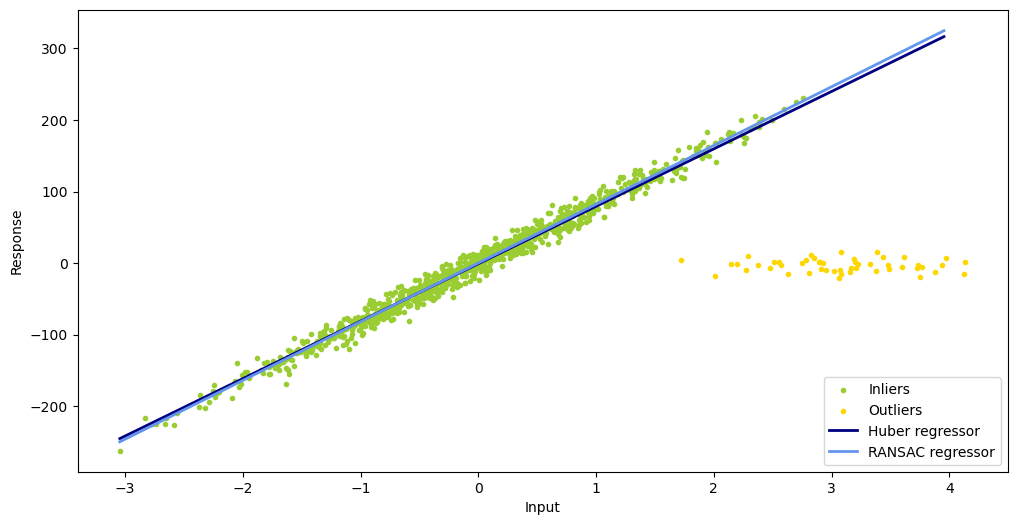

In [104]:
plt.figure(figsize=(12,6))
lw = 2

plt.scatter(X[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.',
            label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color='gold', marker='.',
            label='Outliers')
plt.plot(line_X, line_y, color='navy', linewidth=lw, label='Huber regressor')
plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=lw,
         label='RANSAC regressor')

plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()